In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from datetime import datetime, timedelta

In [23]:
plt.style.use('seaborn-v0_8-whitegrid')

# Task 1: Load and Explore the Dataset

In [24]:
print("Task 1: Load and Explore the Dataset")
print("-" * 50)

Task 1: Load and Explore the Dataset
--------------------------------------------------


In [25]:
# Method 1: Load Iris dataset from sklearn
try:
    # Load the Iris dataset
    iris = load_iris()

    # Create a DataFrame
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

    # Add the target column (species)
    iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    print("Successfully loaded the Iris dataset!")
except Exception as e:
    print(f"Error loading the Iris dataset: {e}")
    exit(1)

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(iris_df.head())

Successfully loaded the Iris dataset!

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [26]:
print("\nDataset Information:")
print(f"Number of rows: {iris_df.shape[0]}")
print(f"Number of columns: {iris_df.shape[1]}")


Dataset Information:
Number of rows: 150
Number of columns: 5


In [27]:
print("\nData Types:")
print(iris_df.dtypes)


Data Types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


In [28]:
# Check for missing values
print("\nMissing Values:")
missing_values = iris_df.isnull().sum()
print(missing_values)


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [29]:
# If there missing values
if missing_values.sum() > 0:
    print("Cleaning the dataset by filling missing values...")
    # For numeric columns, we might fill with the mean
    numeric_cols = iris_df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        iris_df[col].fillna(iris_df[col].mean(), inplace=True)

    # For categorical columns, we might fill with the mode
    cat_cols = iris_df.select_dtypes(include=['category', 'object']).columns
    for col in cat_cols:
        iris_df[col].fillna(iris_df[col].mode()[0], inplace=True)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


# Task 2: Basic Data Analysis

In [30]:
print("\n\nTask 2: Basic Data Analysis")
print("-" * 50)




Task 2: Basic Data Analysis
--------------------------------------------------


In [31]:
# Compute basic statistics
print("\nBasic Statistics:")
print(iris_df.describe())


Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [32]:
# Group by species and compute mean for each numerical column
print("\nMean Values Grouped by Species:")
species_means = iris_df.groupby('species').mean()
print(species_means)


Mean Values Grouped by Species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


C:\Users\Orca\AppData\Local\Temp\ipykernel_21488\1101121007.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = iris_df.groupby('species').mean()


In [33]:
# Find the correlation between variables
print("\nCorrelation Matrix:")
correlation_matrix = iris_df.drop('species', axis=1).corr()
print(correlation_matrix)


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


# Task 3: Data Visualization

In [34]:
print("\n\nTask 3: Data Visualization")
print("-" * 50)



Task 3: Data Visualization
--------------------------------------------------


In [35]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>


Generating time-series data for line chart...


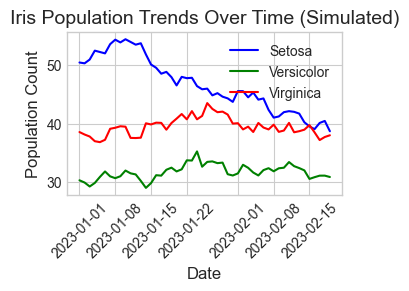

In [36]:
# 1. Line Chart: Create a time series dataset by generating random data
print("\nGenerating time-series data for line chart...")
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2023-01-01', periods=50, freq='D')
species_counts = {
    'setosa': 50 + np.random.randn(50).cumsum(),
    'versicolor': 30 + np.random.randn(50).cumsum(),
    'virginica': 40 + np.random.randn(50).cumsum()
}
time_series_df = pd.DataFrame({
    'date': dates,
    'setosa': species_counts['setosa'],
    'versicolor': species_counts['versicolor'],
    'virginica': species_counts['virginica']
})

plt.subplot(2, 2, 1)
plt.plot(time_series_df['date'], time_series_df['setosa'], 'b-', label='Setosa')
plt.plot(time_series_df['date'], time_series_df['versicolor'], 'g-', label='Versicolor')
plt.plot(time_series_df['date'], time_series_df['virginica'], 'r-', label='Virginica')
plt.title('Iris Population Trends Over Time (Simulated)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

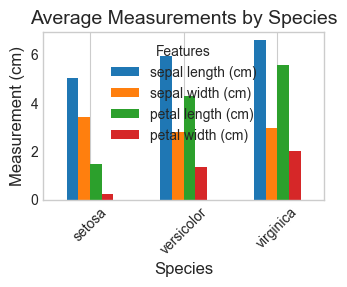

In [37]:
# 2. Bar Chart: Average measurements by species
plt.subplot(2, 2, 2)
species_means.plot(kind='bar', ax=plt.gca())
plt.title('Average Measurements by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Measurement (cm)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.grid(axis='y')
plt.tight_layout()

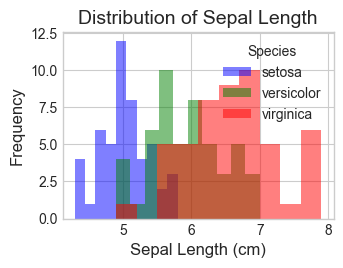

In [38]:
# 3. Histogram: Distribution of sepal length
plt.subplot(2, 2, 3)
for species, color in zip(iris.target_names, ['blue', 'green', 'red']):
    subset = iris_df[iris_df['species'] == species]
    plt.hist(subset['sepal length (cm)'], bins=10, alpha=0.5, color=color, label=species)
plt.title('Distribution of Sepal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()

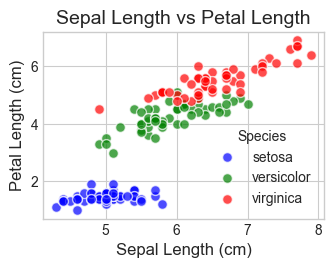

In [39]:
# 4. Scatter Plot: Relationship between sepal length and petal length
plt.subplot(2, 2, 4)
for species, color in zip(iris.target_names, ['blue', 'green', 'red']):
    subset = iris_df[iris_df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], 
                color=color, label=species, alpha=0.7, edgecolors='w', s=50)
plt.title('Sepal Length vs Petal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()